**Zomato Data Analysis Project**


**STEP 1 - Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**STEP 2 - Create the Data Frame**

In [2]:
df=pd.read_csv(r"C:\Users\mudig\Downloads\Zomato data .csv")

In [4]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [5]:
df.isnull().sum()


name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

**Data Cleaning**

In [6]:
#Rate column :it displyes 4.1/5,3.5/5 etc... just remove denominator and show it as only the rating that which they have give ..like if they 
#they give 4.2 just show 4.2 instead of showing 4.2/5

**Convert the data type of column - Rate**

In [22]:
def cnvrtrate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value) 
df['rate']=df['rate'].apply(cnvrtrate) 
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [23]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


**What type of restaurent do the majority of customers order from?**

Text(0.5, 0, 'Type of restaurent')

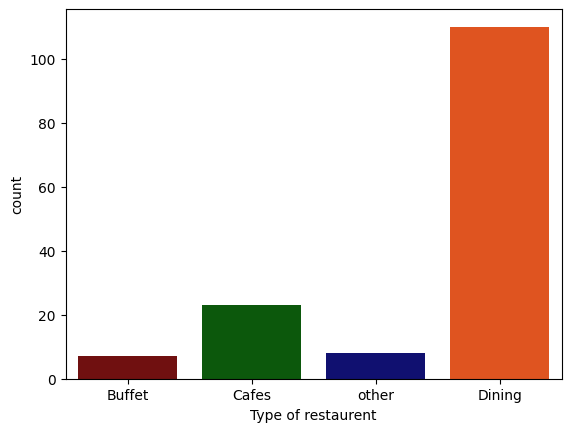

In [30]:
colors = ['#800000', '#006400', '#000080', '#FF4500']
sns.countplot(x=df['listed_in(type)'],hue='listed_in(type)',data= df,palette=colors)  
plt.xlabel("Type of restaurent")

**Conclusion :- majority of the resturent falls in dinning category**

**How many votes has each type of restaurent received from customers**

In [34]:
grouped_data=df.groupby('listed_in(type)')['votes'].sum() 
result=pd.DataFrame({'Votes':grouped_data}) 
result

,Votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


Text(0, 0.5, 'Votes')

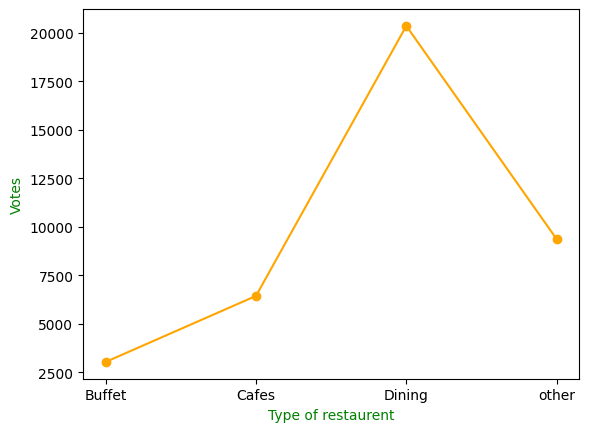

In [48]:
plt.plot(result,c='orange',marker='o') 
plt.xlabel("Type of restaurent",c="green",size=10) 
plt.ylabel("Votes",c="green",size=10)

**Conclusion: dinning restaurents has received maximum votes**

**What are the ratings that the majority of restaurents have received**

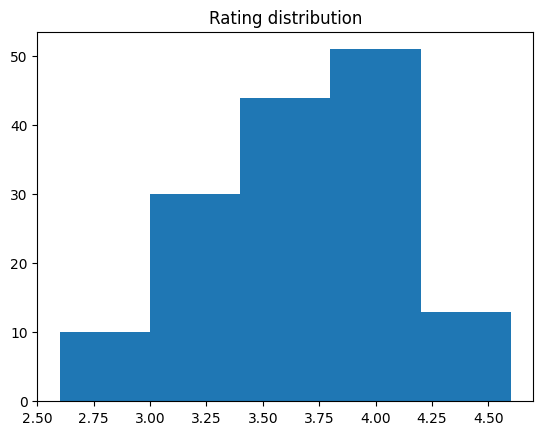

In [49]:
plt.hist(df['rate'],bins=5)
plt.title("Rating distribution") 
plt.show()

**Conclusion:- the majority restaurent received ratings from 3.5 to 4**

**average spending on each order by couples**

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

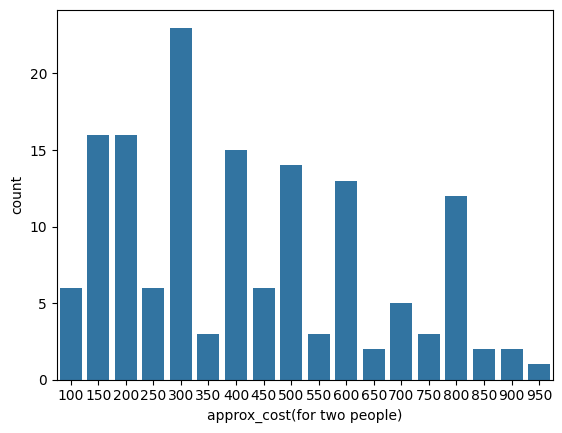

In [52]:
couple_data=df['approx_cost(for two people)'] 
sns.countplot(x=couple_data)

**Conclusion: majority of couples prefer restaurents with an approx cost of 300 rupees.**

**which mode (online/offline) has received the maximum rating**

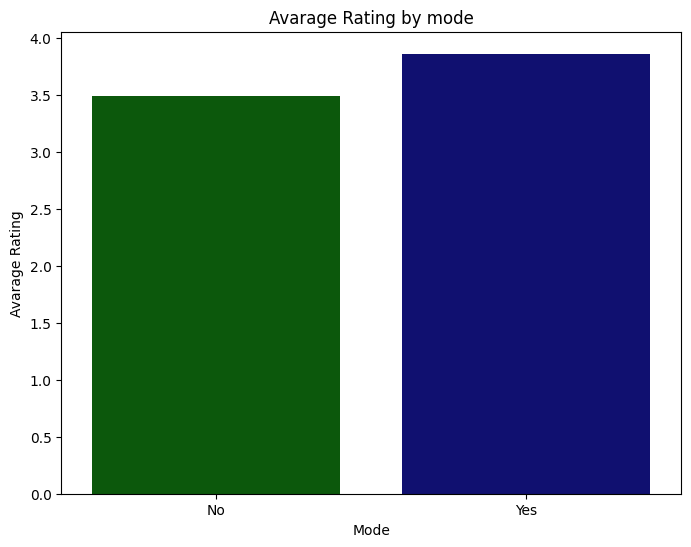

In [61]:
mean_ratings=df.groupby('online_order')['rate'].mean().reset_index() 
plt.figure(figsize=(8,6)) 
sns.barplot(x='online_order',y='rate',hue='online_order',data=mean_ratings,palette=['#006400', '#000080'])
plt.title("Avarage Rating by mode") 
plt.xlabel("Mode") 
plt.ylabel("Avarage Rating")
plt.show()
        

**Conclusion:- offline order received lower rating comparing to online order**

**Which type of restaurent received more offline orders**

In [64]:
pivot_table=df.pivot_table(index="listed_in(type)",columns='online_order',aggfunc='size',fill_value=0)
pivot_table

online_order,No,Yes
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,77,33
other,2,6


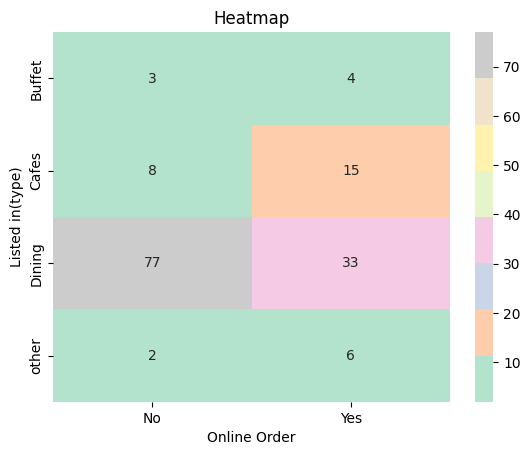

In [75]:
sns.heatmap(pivot_table,annot=True,cmap="Pastel2",fmt='d') 
plt.title("Heatmap")  
plt.xlabel("Online Order") 
plt.ylabel("Listed in(type)") 
plt.show()


**Conclusion:- Dining restaurents primarly accept offline orders , whereas cafes primarly receive online orders. This suggests that clients prefer to
place ordes in person at restaurents , but prefer online orders at cafes.**